## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.model_selection import train_test_split

## Load Data

In [2]:
data = pd.read_csv('travel_ticket.csv', parse_dates=['Created','DepartureTime','CancelTime'],encoding='utf-8')
data.head()

,Created,CancelTime,DepartureTime,BillID,TicketID,ReserveStatus,UserID,Male,Price,CouponDiscount,...,Domestic,VehicleType,VehicleClass,TripReason,Vehicle,Cancel,HashPassportNumber_p,HashEmail,BuyerMobile,NationalCode
0,2022-10-23 09:38:49.110,NaT,2022-11-02 23:59:00,39710203,1091777.0,5,122885.0,True,6600000.0,34425.0,...,1,NaN,False,Work,Plane,0,NaN,66c7f29e3b92f3b77e20830ac29e7758037a53d2238a5b...,764974891906,477368495
1,2022-08-15 14:51:43.160,NaT,2022-08-18 04:15:00,38689463,1070902.0,5,876925.0,True,9500000.0,0.0,...,1,NaN,False,Int,Plane,0,NaN,b24634843858a4175d03422aa9e7211ec3b9f3ce4c481c...,27479149496,15987669
2,2022-09-20 17:25:27.250,NaT,2022-09-21 11:00:00,39245173,7624237.0,3,916640.0,False,2000000.0,0.0,...,1,VIP 2+1,True,Work,Bus,0,NaN,NaN,323657282999,667640412
3,2022-06-25 11:32:53.980,NaT,2022-06-26 08:30:00,37957585,2867547.0,2,NaN,False,40000.0,0.0,...,1,3 ستاره اتوبوسي,NaN,Int,Train,0,NaN,NaN,169459057632,392476186
4,2022-06-01 11:30:53.633,NaT,2022-06-02 23:00:00,37584530,7212559.0,3,NaN,True,1130000.0,0.0,...,1,اسکانیا تک صندلی ۳۱نفره,True,Int,Bus,0,NaN,NaN,408595008421,79497837


### Data Understanding

In [3]:
print (f'Data shape: {data.shape}')

Data shape: (101017, 22)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101017 entries, 0 to 101016
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Created               101017 non-null  datetime64[ns]
 1   CancelTime            15326 non-null   datetime64[ns]
 2   DepartureTime         101017 non-null  datetime64[ns]
 3   BillID                101017 non-null  int64         
 4   TicketID              101017 non-null  float64       
 5   ReserveStatus         101017 non-null  int64         
 6   UserID                42543 non-null   float64       
 7   Male                  101017 non-null  bool          
 8   Price                 101017 non-null  float64       
 9   CouponDiscount        101017 non-null  float64       
 10  From                  101017 non-null  object        
 11  To                    101017 non-null  object        
 12  Domestic              101017 non-null  int64         
 13 

### Check and Fix Data (if necessary)

In [5]:
#check objects data dtypes
categorical_columns = data.select_dtypes(include='object')
for columns in categorical_columns:
  print(data[columns].value_counts())
  print('====================')

From
تهران           29518
مشهد            11421
اصفهان           9473
شیراز            6332
یزد              3755
                ...  
دشتی (بوشهر)        1
سپیددشت             1
آغری                1
اسلامشهر            1
آلانیا              1
Name: count, Length: 226, dtype: int64
To
تهران       29686
مشهد        13242
اصفهان       6956
شیراز        4839
یزد          3657
            ...  
استهبان         1
دهگلان          1
عنبرآباد        1
اسلامشهر        1
دوربان          1
Name: count, Length: 307, dtype: int64
VehicleType
4 ستاره اتوبوسي صبا                                                                                     6221
3 ستاره 6 تخته پارسي                                                                                    3021
25 نفره (VIP)                                                                                           2237
4 ستاره 4 تخته غزال                                                                                     1982
4 ستاره اتوبوسي نگين      

In [6]:
#delete effectless_cols

def Del_Effectless_Cols(data):
    for col in ['CancelTime','BillID','UserID','VehicleType','VehicleClass','BuyerMobile','HashEmail','HashPassportNumber_p','NationalCode']:
        data = data.drop(labels=col, inplace=False, axis=1)
    return data

data = Del_Effectless_Cols(data)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101017 entries, 0 to 101016
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Created         101017 non-null  datetime64[ns]
 1   DepartureTime   101017 non-null  datetime64[ns]
 2   TicketID        101017 non-null  float64       
 3   ReserveStatus   101017 non-null  int64         
 4   Male            101017 non-null  bool          
 5   Price           101017 non-null  float64       
 6   CouponDiscount  101017 non-null  float64       
 7   From            101017 non-null  object        
 8   To              101017 non-null  object        
 9   Domestic        101017 non-null  int64         
 10  TripReason      101017 non-null  object        
 11  Vehicle         101017 non-null  object        
 12  Cancel          101017 non-null  int64         
dtypes: bool(1), datetime64[ns](2), float64(3), int64(3), object(4)
memory usage: 9.3+ MB


In [8]:
#change bool data type to int64
data['Male'] = data['Male'].astype('int64')

In [9]:
#change object data type to categorical

data['TripReason'] = pd.Categorical(
    data['TripReason'], categories=['Work', 'Int'], ordered = False
    )

data['Vehicle'] = pd.Categorical(
    data['Vehicle'], categories=['Bus', 'Train', 'Plane', 'InternationalPlane'], ordered = True
    )


In [10]:
data.describe()

,Created,DepartureTime,TicketID,ReserveStatus,Male,Price,CouponDiscount,Domestic,Cancel
count,101017,101017,1.010170e+05,101017.000000,101017.000000,1.010170e+05,1.010170e+05,101017.000000,101017.000000
mean,2022-07-20 11:07:08.617269248,2022-07-26 10:57:55.516794368,4.941459e+06,3.158053,0.611234,3.203236e+06,4.777172e+03,0.992130,0.151618
min,2022-01-31 21:03:45.487000,2022-01-31 23:59:00,1.015856e+06,2.000000,0.000000,-1.514000e+06,-2.000000e+03,0.000000,0.000000
25%,2022-05-22 21:21:11.663000064,2022-05-29 16:15:00,2.851847e+06,2.000000,0.000000,1.075000e+06,0.000000e+00,1.000000,0.000000
50%,2022-08-04 14:07:44.440000,2022-08-11 20:20:00,3.079610e+06,3.000000,1.000000,1.690000e+06,0.000000e+00,1.000000,0.000000
75%,2022-09-24 11:56:03.720000,2022-09-29 11:30:00,7.433800e+06,4.000000,1.000000,3.043500e+06,0.000000e+00,1.000000,0.000000
max,2022-11-03 00:19:24.717000,2023-03-08 13:00:00,7.782877e+06,5.000000,1.000000,3.837646e+08,1.443333e+07,1.000000,1.000000
std,NaN,NaN,2.410495e+06,1.073276,0.487472,7.349195e+06,6.127747e+04,0.088363,0.358652


array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'CouponDiscount'}>]], dtype=object)

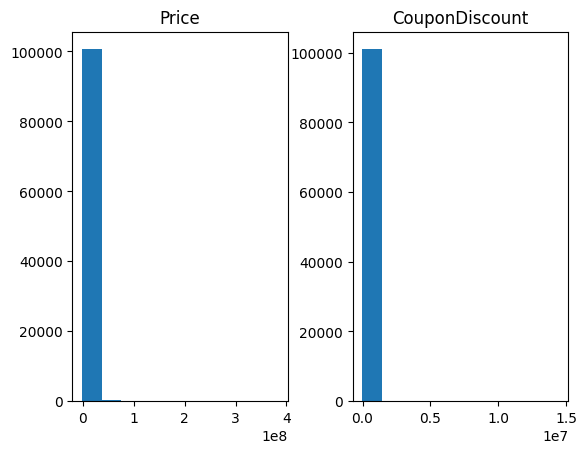

In [11]:
data[['Price','CouponDiscount']].hist(grid=False)

**Observations:**
- There may be outliers in the `Price` and `CouponDiscount` columns that will need to be dealt with later.

### Handle Duplicated Data

In [12]:
#Check ratio of unique values
len(data.drop_duplicates(subset = ['TicketID'])) / len(data)

0.9992179534137818

In [13]:
duplicates = data[data.duplicated(keep=False)]
duplicates

,Created,DepartureTime,TicketID,ReserveStatus,Male,Price,CouponDiscount,From,To,Domestic,TripReason,Vehicle,Cancel
4302,2022-07-28 12:05:44.417,2022-08-08 21:40:00,7452955.0,3,0,1225000.0,0.0,مشهد (خراسان ),تهران,1,Int,Bus,0
43959,2022-08-04 15:20:33.203,2022-08-06 04:40:00,1067895.0,5,1,5870000.0,80000.0,اهواز,تهران,1,Int,Plane,0
76089,2022-07-28 12:05:44.417,2022-08-08 21:40:00,7452955.0,3,0,1225000.0,0.0,مشهد (خراسان ),تهران,1,Int,Bus,0
82091,2022-08-04 15:20:33.203,2022-08-06 04:40:00,1067895.0,5,1,5870000.0,80000.0,اهواز,تهران,1,Int,Plane,0


There are two duplicates found.

In [14]:
# Save info before delete the duplicate
print(f"Shape before: {data.shape}")

# Hapus the duplicate (only save the first unique value)
df_clean = data.drop_duplicates()

print(f"Shape after: {df_clean.shape}")
print(f"deleted row: {len(data) - len(df_clean)}")

Shape before: (101017, 13)
Shape after: (101015, 13)
deleted row: 2


## Data Cleaning_EDA

In [15]:
data_eda = data.copy()

### Handle Missing Data

In [16]:
#check missing values
missing_eda = data_eda.isnull().sum().reset_index()
missing_eda.columns = ['features', 'missing_values']
missing_eda['percentage'] = (missing_eda['missing_values']/len(data_eda)) *100
missing_eda

,features,missing_values,percentage
0,Created,0,0.0
1,DepartureTime,0,0.0
2,TicketID,0,0.0
3,ReserveStatus,0,0.0
4,Male,0,0.0
5,Price,0,0.0
6,CouponDiscount,0,0.0
7,From,0,0.0
8,To,0,0.0
9,Domestic,0,0.0


There is no missing value in the selected data.

## Data Manipulation_EDA

In [17]:
#data_filled['MonthlyIncome'].hist(bins=15, grid=False)

In [18]:
#"bin" continuous variables into groups - Price into PriceGroup
data_eda['PriceGroup'] = pd.cut(data_eda['Price'], bins = [0, 20000, 25000, 30000, 35000, 40000, float('inf')],
                            labels = ['<20000', '20000-25000', '25000-30000', '30000-35000', '35000-40000', '40000+'])

In [19]:
#"bin" continuous variables into groups - CouponDiscount into Group
data_eda['CouponDiscountGroup'] = pd.cut(data_eda['CouponDiscount'], bins = [0, 20000, 25000, 30000, 35000, 40000, float('inf')],
                            labels = ['<20000', '20000-25000', '25000-30000', '30000-35000', '35000-40000', '40000+'])

In [20]:
data_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101017 entries, 0 to 101016
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Created              101017 non-null  datetime64[ns]
 1   DepartureTime        101017 non-null  datetime64[ns]
 2   TicketID             101017 non-null  float64       
 3   ReserveStatus        101017 non-null  int64         
 4   Male                 101017 non-null  int64         
 5   Price                101017 non-null  float64       
 6   CouponDiscount       101017 non-null  float64       
 7   From                 101017 non-null  object        
 8   To                   101017 non-null  object        
 9   Domestic             101017 non-null  int64         
 10  TripReason           101017 non-null  category      
 11  Vehicle              101017 non-null  category      
 12  Cancel               101017 non-null  int64         
 13  PriceGroup    

In [21]:
print(f'Data Shape: {data_eda.shape}')

Data Shape: (101017, 15)


In [22]:
data_eda.to_csv('EDA_cleaned.csv', index=False)

## Data Cleaning_Machine Learning

In [23]:
data_ml = data.copy()

In [24]:
data_ml = data_ml.set_index("TicketID").drop(columns=["TicketID"], errors="ignore")

In [25]:
# Split the data into training and testing sets
train_df, test_df = train_test_split(data_ml, test_size = 0.2, random_state=42)

### Handle Missing Data for Training Set

In [26]:
#check missing values in training data
missing_ml = train_df.isnull().sum().reset_index()
missing_ml.columns = ['features', 'missing_values']
missing_ml['percentage'] = (missing_ml['missing_values']/len(train_df)) *100
missing_ml

,features,missing_values,percentage
0,Created,0,0.0
1,DepartureTime,0,0.0
2,ReserveStatus,0,0.0
3,Male,0,0.0
4,Price,0,0.0
5,CouponDiscount,0,0.0
6,From,0,0.0
7,To,0,0.0
8,Domestic,0,0.0
9,TripReason,0,0.0


There is no Missing value on selected data.

### Encode Categorical Variables for Training Set

In [27]:
train_encoded = train_df.copy()


In [28]:
#encode TripReason
train_encoded['TripReason'] = train_encoded['TripReason'].map({'Work': 0, 'Int': 1}).astype(int)

In [30]:
#mean encoding for From, To, and Vehicle
occ_mean = train_encoded.groupby('From', observed=True)['Cancel'].mean().to_dict()
print(occ_mean)

prod_mean = train_encoded.groupby('To', observed=True)['Cancel'].mean().to_dict()
print(prod_mean)

desig_mean = train_encoded.groupby('Vehicle', observed=True)['Cancel'].mean().to_dict()
print(desig_mean)

train_encoded['From'] = train_encoded['From'].map(occ_mean).astype(float)
train_encoded['To'] = train_encoded['To'].map(prod_mean).astype(float)
train_encoded['Vehicle'] = train_encoded['Vehicle'].map(desig_mean).astype(float)

{'آبادان': 0.12077294685990338, 'آباده': 0.1282051282051282, 'آبیک': 0.0, 'آدانا': 0.0, 'آزادور': 0.0, 'آستارا': 0.08, 'آستانه اشرفیه': 0.2, 'آغری': 0.0, 'آلانیا': 0.0, 'آمستردام': 0.0, 'آمل': 0.12962962962962962, 'آنتالیا': 0.0, 'آنکارا': 0.0, 'ابوظبی': 0.0, 'اراک': 0.12, 'ارجان': 0.0, 'اردبیل': 0.12757201646090535, 'اردکان': 0.4, 'اردکان (یزد)': 0.14285714285714285, 'ارومیه': 0.1524163568773234, 'ازمیر': 0.0, 'ازنا': 0.23076923076923078, 'استانبول': 0.03, 'استکهلم': 0.6666666666666666, 'اسفراین': 0.0625, 'اسلام آباد غرب': 0.0, 'اسلامشهر': 1.0, 'اصفهان': 0.14105319720580334, 'اقلید': 0.023809523809523808, 'اندیمشک': 0.17535545023696683, 'اهر': 0.0, 'اهواز': 0.20361800588977702, 'ایذه': 0.1276595744680851, 'ایرانشهر': 0.0811965811965812, 'ایروان': 0.5, 'ایلام': 0.17857142857142858, 'ایوان': 0.0, 'بابل': 0.17793594306049823, 'بابلسر': 0.2248062015503876, 'باتومی': 0.0, 'بادرود': 1.0, 'بافت': 0.0, 'بافق': 0.25, 'بانه': 0.0, 'بجستان': 1.0, 'بجنورد': 0.13333333333333333, 'برخوار': 0.085714

In [31]:
train_encoded.head()

,Created,DepartureTime,ReserveStatus,Male,Price,CouponDiscount,From,To,Domestic,TripReason,Vehicle,Cancel
TicketID,,,,,,,,,,,,
7680128.0,2022-10-03 12:17:37.537,2022-10-04 22:30:00,3,0,1220000.0,0.0,0.155781,0.133333,1,1,0.131960,0
7599796.0,2022-09-09 21:44:58.937,2022-09-10 10:00:00,3,0,1995000.0,0.0,0.203618,0.115844,1,1,0.131960,0
7657796.0,2022-09-28 00:17:21.910,2022-09-29 23:00:00,3,0,1560000.0,0.0,0.135983,0.161350,1,0,0.131960,0
3047024.0,2022-10-04 18:08:46.643,2022-10-08 15:10:00,2,1,2537500.0,0.0,0.203618,0.161350,1,0,0.184589,0
3072962.0,2022-10-22 18:43:41.740,2022-10-27 05:20:00,2,0,70000.0,0.0,0.155781,0.078447,1,1,0.184589,0


### Encode Categorical Variables for Testing Set

In [33]:
test_encoded = test_df.copy()

In [34]:
#encode TripReason
test_encoded['TripReason'] = test_encoded['TripReason'].map({'Work': 0, 'Int': 1}).astype(int)


In [35]:
#mean encoding for From, To, and Vehicle
occ_mean_test = test_encoded.groupby('From', observed=True)['Cancel'].mean().to_dict()
print(occ_mean_test)

prod_mean_test = test_encoded.groupby('To', observed=True)['Cancel'].mean().to_dict()
print(prod_mean_test)

desig_mean_test = test_encoded.groupby('Vehicle', observed=True)['Cancel'].mean().to_dict()
print(desig_mean_test)

test_encoded['From'] = test_encoded['From'].map(occ_mean_test).astype(float)
test_encoded['To'] = test_encoded['To'].map(prod_mean_test).astype(float)
test_encoded['Vehicle'] = test_encoded['Vehicle'].map(desig_mean_test).astype(float)

{'آبادان': 0.078125, 'آباده': 0.0, 'آبیک': 0.0, 'آزادور': 0.0, 'آستارا': 0.125, 'آستانه اشرفیه': 0.0, 'آمل': 0.16666666666666666, 'آنتالیا': 0.0, 'آنکارا': 0.0, 'اراک': 0.12121212121212122, 'ارجان': 0.0, 'اردبیل': 0.10526315789473684, 'اردکان': 0.3333333333333333, 'اردکان (یزد)': 0.3, 'ارومیه': 0.09701492537313433, 'ازمیر': 0.0, 'ازنا': 0.0, 'استانبول': 0.030303030303030304, 'اسفراین': 0.0, 'اسلام آباد غرب': 0.0, 'اصفهان': 0.15524889107934944, 'اقلید': 0.14285714285714285, 'اندیمشک': 0.11764705882352941, 'اهر': 0.0, 'اهواز': 0.20097244732576985, 'ایذه': 0.17647058823529413, 'ایرانشهر': 0.13432835820895522, 'ایلام': 0.16666666666666666, 'بابل': 0.203125, 'بابلسر': 0.3055555555555556, 'بافق': 0.5, 'بانه': 0.0, 'بجنورد': 0.17647058823529413, 'برخوار': 0.125, 'برداسکن': 0.0, 'بروجرد': 0.1111111111111111, 'بروجن': 0.14285714285714285, 'بشرویه': 0.0, 'بغداد': 0.5, 'بم': 0.1, 'بندر لنگه': 0.6666666666666666, 'بندرانزلی': 0.05714285714285714, 'بندرعباس': 0.1678832116788321, 'بهبهان': 0.1914893

In [36]:
test_encoded.head()

,Created,DepartureTime,ReserveStatus,Male,Price,CouponDiscount,From,To,Domestic,TripReason,Vehicle,Cancel
TicketID,,,,,,,,,,,,
7364777.0,2022-07-07 10:59:33.807,2022-07-08 11:00:00,3,0,1300000.0,0.0,0.132353,0.110212,1,1,0.136173,0
2892202.0,2022-07-09 13:18:17.260,2022-07-15 14:05:00,2,1,1553000.0,0.0,0.190581,0.167086,1,1,0.184791,0
1087103.0,2022-10-08 14:37:44.667,2022-10-11 11:00:00,5,1,11446000.0,0.0,0.190581,0.110212,1,0,0.130282,0
3014867.0,2022-09-19 15:19:17.757,2022-09-27 02:00:00,2,0,2798500.0,0.0,0.153846,0.134483,1,0,0.184791,0
2978865.0,2022-08-30 11:48:14.007,2022-09-25 08:10:00,2,1,4666000.0,0.0,0.190581,0.110212,1,1,0.184791,0


### Save Train and Test Set

In [37]:
# Save split data
train_encoded.to_csv('train.csv', index=False)
test_encoded.to_csv('test.csv', index=False)